In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
def convert_y(dataY):
    y = []
    for i in range (len(dataY)):
        if(dataY[i] > 50):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

In [3]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY_multi = pd.read_csv('./datasets/spotofy_music_labels.csv')
Y = convert_y(np.array(dataY))
dataX.head()

,Explicit,Artist_followers,Track_number_on_album,Acousticness,Danceability,Energy,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
0,1.112882,1.012971,-0.703623,-0.253508,-0.056900,-0.257351,-0.321798,-0.287111,1.295366,2.132090,0.865448,0.478965,0.209096
1,-0.898356,0.172558,-0.703623,0.798171,0.424214,-0.688588,-0.492682,0.282796,-0.811102,-0.910119,0.865448,0.752338,0.774957
2,-0.898356,-0.658039,-0.703623,0.764382,0.223151,0.783781,0.019972,0.893382,-0.654093,-0.677720,-1.155199,1.025710,1.138724
3,-0.898356,-0.471741,1.732316,-0.619272,-1.528965,0.506556,-0.410955,0.398452,-0.609112,2.593547,0.865448,0.752338,-1.555849
4,-0.898356,0.029319,-0.703623,-0.683893,0.330863,-1.138308,1.097289,-0.823916,-0.601473,-0.142817,0.865448,-1.434643,-1.806445


In [13]:
reduced_data = PCA(n_components=2).fit_transform(dataX)
kmeans = KMeans(init="k-means++", n_init=4)
kmeans.fit(reduced_data)

KMeans(n_init=4)

In [19]:
reduced_data[0]

array([-0.09619238,  1.5993962 ])

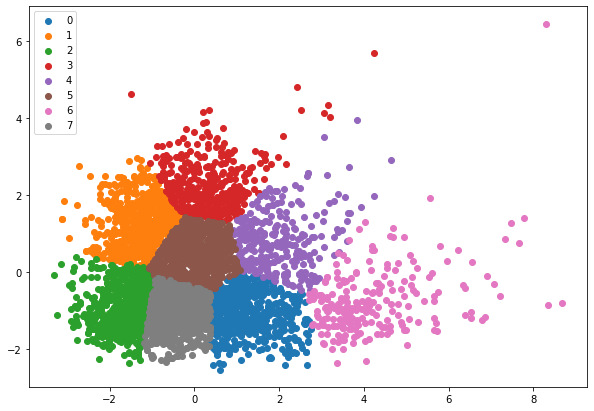

In [24]:
plt.figure(figsize=(10,7))
for i in range(8):
    indices = [j for j in range(len(kmeans.labels_)) if kmeans.labels_[j]==i]
    plotting = [reduced_data[j] for j in indices]
    plt.scatter([x for x,_ in plotting], [y for _,y in plotting], label = f"{i}")
plt.legend()
plt.show()

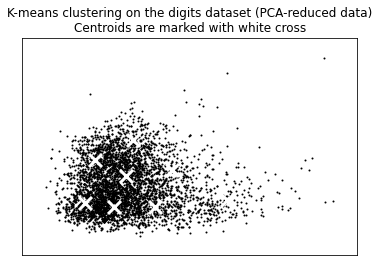

In [25]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()